In [ ]:
%pip install plotly
#%pip install cufflinks
#%pip install chart-studio

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, HuberRegressor, HuberRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import RobustScaler

In [ ]:
base_casa = pd.read_csv('https://drive.google.com/uc?export=download&id=1cYpnXpTiSG7grLe2D0gYNUfOFxi5aLsF')
base_casa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
base_casa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


There aren't any null values in this dataframe.

In [ ]:
base_casa.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
# Checking boxplot of one of the features
fig = px.box(base_casa, x="Avg. Area Income")
fig.show()

In [ ]:
# Checking boxplot of the target
fig = px.box(base_casa, x="Price")
fig.show()

Removing spaces from the title of the columns is a good practice.

In [ ]:
# get the name of the columns
base_casa.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
# replacing spaces for underlines for better practices
base_casa = base_casa.rename(columns={"Avg. Area Income":"Avg_Area_Income", "Avg. Area House Age":"Avg_Area_House_Age","Avg. Area Number of Rooms":"Avg_Area_Number_of_Rooms",
                                      "Avg. Area Number of Bedrooms":"Avg_Area_Number_of_Bedrooms","Area Population":"Area_Population"})
base_casa.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


The ```Address``` column doesn't have any value in this case.

In [ ]:
base_casa.drop(["Address"], axis=1, inplace=True)

Checking the correlations between Price and features.

<Axes: >

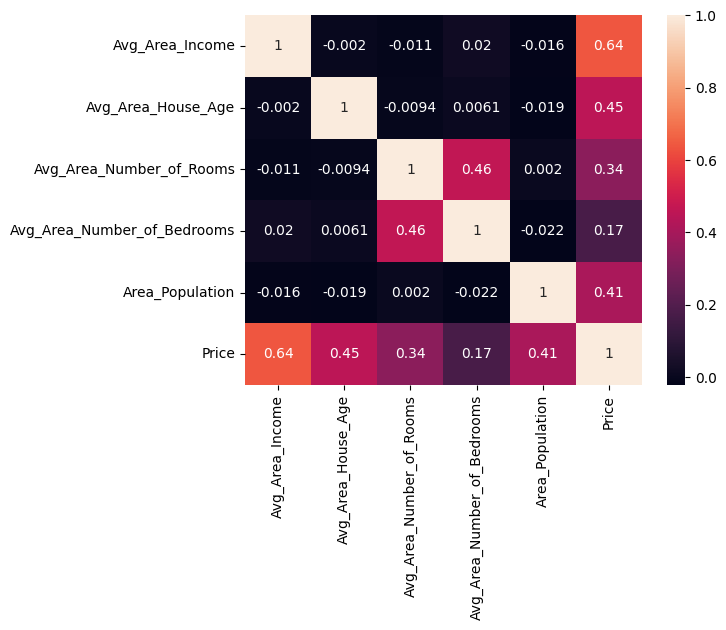

In [ ]:
sns.heatmap(base_casa.corr(), annot=True)

```Avg_Area_Income```, ```Avg_Area_House_Age```, and ```Area_Population``` are mildly correlated with ```Price```.

```Avg_Area_Number_of_Rooms``` and ```Avg_Area_Number_of_Bedrooms``` are mildly correlated with each other but weakly correlated with ```Price```.

In [ ]:
base_casa.shape

(5000, 6)

We have 5000 observations.

In [ ]:
# Separating X features and y target
X = base_casa.drop("Price", axis=1)
y = base_casa["Price"]

In [ ]:
X['Avg_Area_Income'] = np.log1p(X['Avg_Area_Income'])  # log(1+x) to avoid zero issues
y= np.log1p(y)
X

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population
0,11.284097,5.682861,7.009188,4.09,23086.800503
1,11.280358,6.002900,6.730821,3.09,40173.072174
2,11.023340,5.865890,8.512727,5.13,36882.159400
3,11.056371,7.188236,5.586729,3.26,34310.242831
4,11.001820,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,11.011538,7.830362,6.137356,3.46,22837.361035
4996,11.270755,6.999135,6.576763,4.02,25616.115489
4997,11.057088,7.250591,4.805081,2.13,33266.145490
4998,11.127297,5.534388,7.130144,5.44,42625.620156


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scaling the features
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train) # This gets the mean from the train data
X_test = scaler.transform(X_test) # this applies the train data mean to the test data, this has to be split to avoid data leakage, i.e. the model using information that it isnt' supposed to know

We will compare the performance between Linear Regression and Huber to see if the outliers are having any bad impact in the model.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

huber = HuberRegressor()
huber.fit(X_train, y_train)

y_pred = model.predict(X_test)
huber_pred = huber.predict(X_test)

In [ ]:
r = r2_score(y_test, y_pred)
huber_r = r2_score(y_test, huber_pred)

def adjusted_r2_score(r, X_test, y_test, y_pred):
    n = len(y_test)  # number of observations
    p = X_test.shape[1]   # number of predictors (features)
    adj_r2 = 1 - (1 - r) * (n - 1) / (n - p - 1)
    return adj_r2

adj_r2 = adjusted_r2_score(r, X_test, y_test, y_pred)
adj_huber_r = adjusted_r2_score(huber_r, X_test, y_test, huber_pred)

print(f"Linear Regression:\nR²: {r}, Adjusted R²: {adj_r2}")
print(f"\nHuber Regression:\nR²: {huber_r}, Adjusted R²: {adj_huber_r}")

Linear Regression:
R²: 0.8653328565895291, Adjusted R²: 0.8646554564717701

Huber Regression:
R²: 0.8604165143333389, Adjusted R²: 0.859714384123748


Huber doesn't add any value to this model.

Let's check if there is any bias in the model with cross-validation.

In [ ]:
my_pipeline = Pipeline([('scaler', scaler), ('model', LinearRegression())])

# Multiply by -1 since sklearn calculates *negative* MAE
scores = cross_val_score(my_pipeline, X, y, cv=5, scoring='r2')

print("R2 score:\n", scores.mean())

R2 score:
 0.8449820991096114


There seems to be a bit of bias, since the $R^2$ went from $86.5$ to $84.5$.

The ```Avg_Area_Number_of_Bedrooms``` has a very low correlation with ```Prices``` so it's worth to check if dropping this column entirely makes the model better.

In [ ]:
X = base_casa.drop(["Price", 'Avg_Area_Number_of_Bedrooms'], axis=1)
y = base_casa["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

huber = HuberRegressor()
huber.fit(X_train, y_train)

y_pred = model.predict(X_test)
huber_pred = huber.predict(X_test)

r = r2_score(y_test, y_pred)
huber_r = r2_score(y_test, huber_pred)

adj_r2 = adjusted_r2_score(r, X_test, y_test, y_pred)
adj_huber_r = adjusted_r2_score(huber_r, X_test, y_test, huber_pred)

print(f"Linear Regression:\nR²: {r}, Adjusted R²: {adj_r2}")
print(f"\nHuber Regression:\nR²: {huber_r}, Adjusted R²: {adj_huber_r}")

Linear Regression:
R²: 0.9181214278738103, Adjusted R²: 0.9177922677848609

Huber Regression:
R²: 0.9181001726504954, Adjusted R²: 0.9177709271134119


We can see here that by dropping the ```Avg_Area_Number_of_Bedrooms```, the model performed significantly better, because the correlation was very low (0.17).

We can also see that standard Linear Regression still performs better than Huber.

In [ ]:
my_pipeline = Pipeline([('scaler', scaler), ('model', LinearRegression())])

scores = cross_val_score(my_pipeline, X, y, cv=5, scoring='r2')

print("Linear Regression Results:")
print(" Mean R²:", scores.mean())
print(" Standard deviation:", scores.std())

my_pipeline_huber = Pipeline(steps=[('scaler', scaler), ('huber', HuberRegressor())])

scores_huber = cross_val_score(my_pipeline_huber, X, y, cv=5, scoring='r2')

print("\nHuber results:")
print(" Mean R²:", scores_huber.mean())
print(" Standard deviation:", scores_huber.std())

Linear Regression Results:
 Mean R²: 0.9175829481884815
 Standard deviation: 0.002735567048628494

Huber results:
 Mean R²: 0.9175915789244119
 Standard deviation: 0.0027396551666373607


Cross-validation results in similar values, so there isn't any considerable bias in the model.

In [ ]:
results = cross_validate(my_pipeline, X, y, cv=5, scoring=['r2', 'neg_mean_absolute_error'], return_train_score=True)

print("Test R² scores:", results['test_r2'])
print("Train R² scores:", results['train_r2'])

Test R² scores: [0.91784171 0.92025271 0.91530149 0.92078132 0.91373751]
Train R² scores: [0.91796406 0.91730346 0.918599   0.9172228  0.91896406]


Test R²s and Train R²s also give similar results, so we can be safe about over and underfitting.

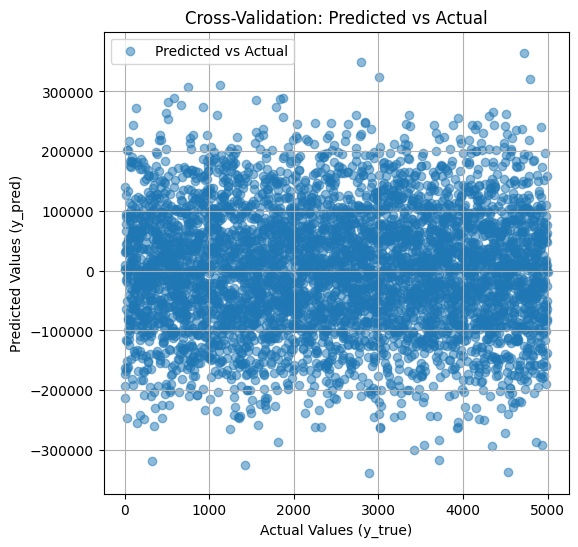

In [ ]:
# Get cross-validated predictions
y_pred = cross_val_predict(my_pipeline, X, y, cv=5)

# Compute errors (residuals)
errors = y - y_pred  # Difference between actual and predicted values

xaxis = [i for i in range(1, len(errors)+1, 1)]

# Create scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(xaxis, errors, alpha=0.5, label="Predicted vs Actual")

# Labels and title
plt.xlabel("Actual Values (y_true)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Cross-Validation: Predicted vs Actual")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

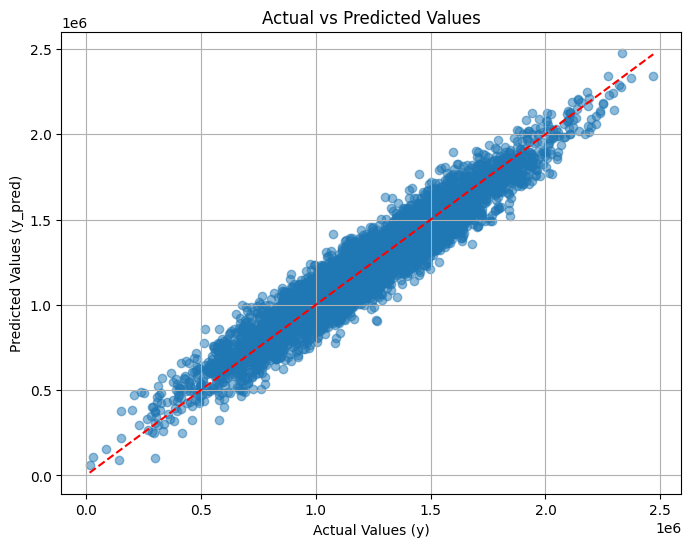

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)  # Plot actual vs predicted
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--') # Plot the regression line
plt.xlabel("Actual Values (y)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

In [ ]:
# Print error statistics
print("Mean Error:", np.mean(errors))
print("Standard Deviation of Errors:", np.std(errors))

Mean Error: -30.779856251874286
Standard Deviation of Errors: 101247.459669575


In [ ]:
results_df = pd.DataFrame({'y': y, 'y_pred': y_pred, 'residuals': errors})

# Display the DataFrame
results_df

,y,y_pred,residuals
0,1.059034e+06,1.222336e+06,-163302.296364
1,1.505891e+06,1.496366e+06,9525.075134
2,1.058988e+06,1.252835e+06,-193847.000494
3,1.260617e+06,1.120134e+06,140482.709941
4,6.309435e+05,8.449589e+05,-214015.394800
...,...,...,...
4995,1.060194e+06,1.060543e+06,-349.497707
4996,1.482618e+06,1.406931e+06,75687.094411
4997,1.030730e+06,1.021351e+06,9378.453959
4998,1.198657e+06,1.262297e+06,-63640.265955


In [ ]:
df_residuals = base_casa.join(results_df)

df_residuals.head()

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,y,y_pred,residuals
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,1.059034e+06,1.222336e+06,-163302.296364
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,1.505891e+06,1.496366e+06,9525.075134
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,1.058988e+06,1.252835e+06,-193847.000494
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,1.260617e+06,1.120134e+06,140482.709941
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,6.309435e+05,8.449589e+05,-214015.394800


In [ ]:
df_residuals[df_residuals['residuals'] > 0.2]

,Avg_Area_Income,Avg_Area_House_Age,Avg_Area_Number_of_Rooms,Avg_Area_Number_of_Bedrooms,Area_Population,Price,y,y_pred,residuals
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,1.505891e+06,1.496366e+06,9525.075134
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,1.260617e+06,1.120134e+06,140482.709941
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,1.068138e+06,1.066779e+06,1358.974042
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,1.573937e+06,1.571850e+06,2086.835755
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,7.988695e+05,7.671391e+05,31730.393702
...,...,...,...,...,...,...,...,...,...
4987,65729.222330,6.237787,6.860475,3.12,25573.854289,1.197073e+06,1.197073e+06,1.038644e+06,158429.523292
4991,74102.191890,5.657841,7.683993,3.13,24041.270592,1.263721e+06,1.263721e+06,1.201282e+06,62438.482720
4992,87499.125743,6.403473,4.836091,4.02,40815.199679,1.568701e+06,1.568701e+06,1.521472e+06,47228.647110
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,1.482618e+06,1.406931e+06,75687.094411


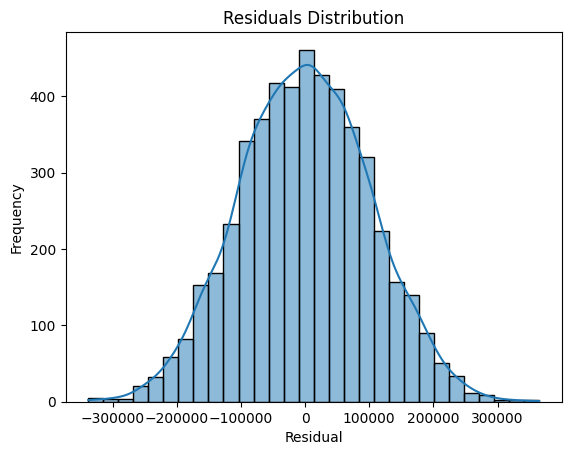

In [ ]:
sns.histplot(df_residuals["residuals"], bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

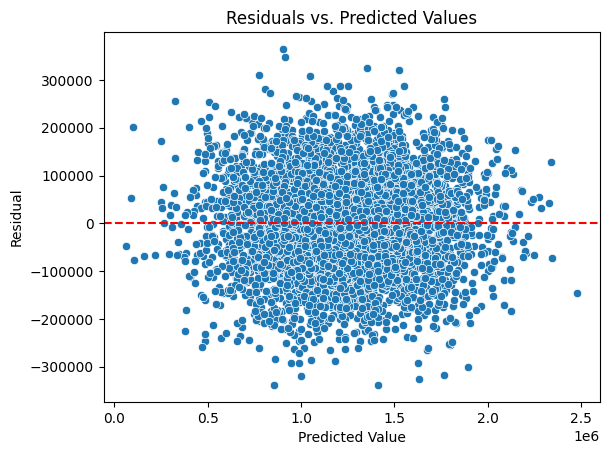

In [ ]:
sns.scatterplot(x=df_residuals["y_pred"], y=df_residuals["residuals"])
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.show()

Conclusion:

The model performed well on the above circustances. Attempts to improve it were not successful. Scaling the features, for example gave the same results, and removing outliers actually made it worse. Using models which are less sensible to outliers (RANSAC, Huber) also did not net any significant improvements.

This is probably due to limitations to how Linear Regression works. It's a great time to try another model.

In [ ]:
# from google.colab import files

# # Save the DataFrame to a CSV file
# df_residuals.to_csv('lr_housing.csv', index=False)

# # Download the file
# files.download('lr_housing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>